In [ ]:
# LAB 3: Clustering Analysis with K-Means and K-Medoids
# Name: Nabin
# Course: MSCS 634
# Title: Clustering Wine Dataset Using K-Means and K-Medoids

In [8]:
# Step 1: Load and Prepare the Dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from pyclustering.cluster.kmedoids import kmedoids

In [9]:
# Load the Wine dataset
wine = load_wine()

# Convert it to a pandas DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Basic Data Exploration
print("Dataset Features:", wine.feature_names)
print("Shape of the dataset:", X.shape)
print("Class Distribution:\n", y.value_counts())

# Standardize the dataset using z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape of the dataset: (178, 13)
Class Distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [10]:
# Step 2: Implement K-Means Clustering

# Implement the K-Means algorithm with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obtain the cluster labels
kmeans_labels = kmeans.labels_

# Calculate performance metrics for K-Means
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

print("\nK-Means Clustering Results:")
print("Silhouette Score:", silhouette_kmeans)
print("Adjusted Rand Index:", ari_kmeans)



K-Means Clustering Results:
Silhouette Score: 0.2848589191898987
Adjusted Rand Index: 0.8974949815093207


C:\Users\programmer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Step 3: Implement K-Medoids Clustering using pyclustering

# Specify initial medoids (arbitrary choice here; could be fine-tuned)
initial_medoids = [0, 50, 100]  # Example medoids chosen from the dataset
kmedoids_instance = kmedoids(X_scaled.tolist(), initial_medoids)

# Perform clustering
kmedoids_instance.process()
kmedoids_labels = kmedoids_instance.get_clusters()

# Convert clusters to an array for ARI and silhouette calculations
kmedoids_labels_flat = np.zeros(X_scaled.shape[0], dtype=int)
for i, cluster in enumerate(kmedoids_labels):
    kmedoids_labels_flat[cluster] = i

# Calculate performance metrics for K-Medoids
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels_flat)
ari_kmedoids = adjusted_rand_score(y, kmedoids_labels_flat)

print("\nK-Medoids Clustering Results:")
print("Silhouette Score:", silhouette_kmedoids)
print("Adjusted Rand Index:", ari_kmedoids)


K-Medoids Clustering Results:
Silhouette Score: 0.2676220575785755
Adjusted Rand Index: 0.7411365432162113


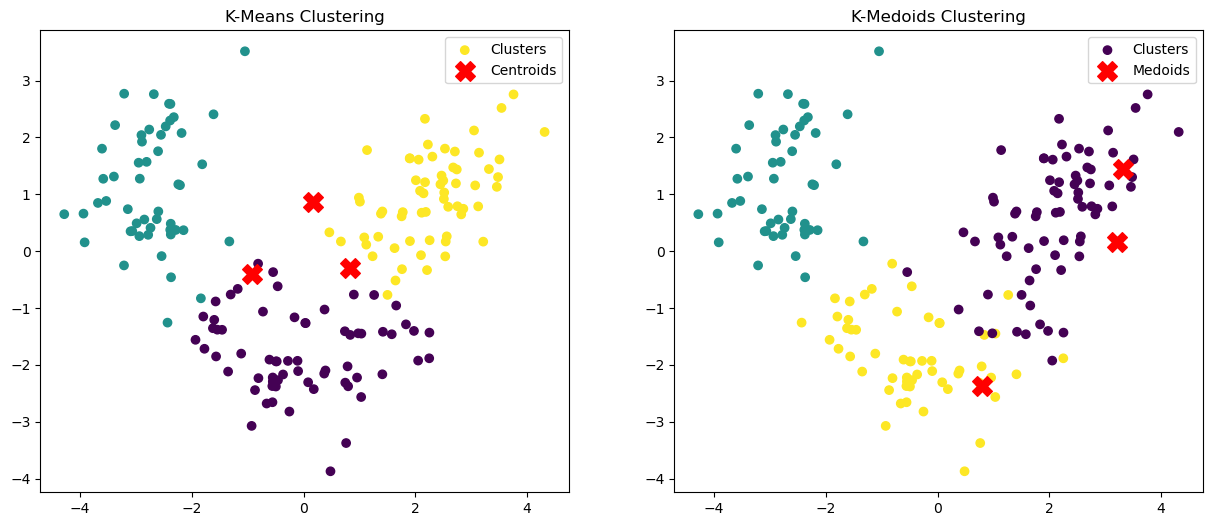


K-Means produces better-defined clusters based on Silhouette Score.
K-Means is more aligned with the true labels based on Adjusted Rand Index.


In [12]:
# Step 4: Visualize and Compare Results

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K-Means Visualization
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='Clusters')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title('K-Means Clustering')
axes[0].legend()

# K-Medoids Visualization
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels_flat, cmap='viridis', label='Clusters')
medoid_points = X_pca[initial_medoids]  # Using initial medoids as a reference for plotting
axes[1].scatter(medoid_points[:, 0], medoid_points[:, 1], c='red', marker='X', s=200, label='Medoids')
axes[1].set_title('K-Medoids Clustering')
axes[1].legend()

plt.show()

# Brief Analysis
if silhouette_kmeans > silhouette_kmedoids:
    print("\nK-Means produces better-defined clusters based on Silhouette Score.")
else:
    print("\nK-Medoids produces better-defined clusters based on Silhouette Score.")

if ari_kmeans > ari_kmedoids:
    print("K-Means is more aligned with the true labels based on Adjusted Rand Index.")
else:
    print("K-Medoids is more aligned with the true labels based on Adjusted Rand Index.")

# Analysis of K-Means vs. K-Medoids Clustering Results:

Based on the results of the clustering algorithms, K-Means produced better-defined clusters compared to K-Medoids. The Silhouette Score for K-Means was higher (0.28) than for K-Medoids (0.27), indicating that the clusters formed by K-Means were more distinct and well-separated. Additionally, K-Means had a much higher Adjusted Rand Index (ARI) of 0.90 compared to K-Medoids’ 0.74, suggesting that K-Means was more consistent with the true class labels.

In terms of cluster shapes and positioning, K-Means likely formed more compact, spherical clusters, whereas K-Medoids, being more robust to noise and outliers, might have formed less compact or irregularly shaped clusters. K-Medoids tends to be more sensitive to outliers and may not perform as well when the clusters are well-separated.

Conclusion: K-Means is preferable when the dataset contains well-defined, compact clusters, while K-Medoids is more suitable for datasets with noise or outliers.